In [1]:
import os
print(os.getcwd())

C:\Users\brigh\JNoteBook\Okkhor


In [2]:
directory = "o i u ri a ii uu e oo oi ou ko kho go gho ngo cho chho jo jho ngeo sho to tho do dho no ro too thoo doo dhoo lo po pho bo bho mo ho".split()

print(directory)
print(len(directory))

parent_dir = "C:/Users/brigh/JNoteBook/Okkhor/OData/alphabets_audio"
  
for d in directory:
    path = os.path.join(parent_dir, d) 

    #os.mkdir(path)
print("directory created!!!")

['o', 'i', 'u', 'ri', 'a', 'ii', 'uu', 'e', 'oo', 'oi', 'ou', 'ko', 'kho', 'go', 'gho', 'ngo', 'cho', 'chho', 'jo', 'jho', 'ngeo', 'sho', 'to', 'tho', 'do', 'dho', 'no', 'ro', 'too', 'thoo', 'doo', 'dhoo', 'lo', 'po', 'pho', 'bo', 'bho', 'mo', 'ho']
39
directory created!!!


In [2]:
# Usual Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

import csv
import pathlib

# Librosa (the mother of audio files)
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [9]:
# Importing 1 file
y, sr = librosa.load(f'./OData/alphabets_audio/ko/ko_2.mp3')

print('y:', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n')

# Verify length of the audio
print('Check Len of Audio:', 28224/22050)

y: [ 4.1542796e-07 -4.6121488e-07  2.5686633e-05 ...  8.2510803e-04
  9.9487987e-04  9.2073611e-04] 

y shape: (49392,) 

Sample Rate (KHz): 22050 

Check Len of Audio: 1.28


In [10]:
audio_file, _ = librosa.effects.trim(y)

# the result is an numpy ndarray
print('Audio File:', audio_file, '\n')
print('Audio File shape:', np.shape(audio_file))

Audio File: [ 4.1542796e-07 -4.6121488e-07  2.5686633e-05 ...  8.2510803e-04
  9.9487987e-04  9.2073611e-04] 

Audio File shape: (49392,)


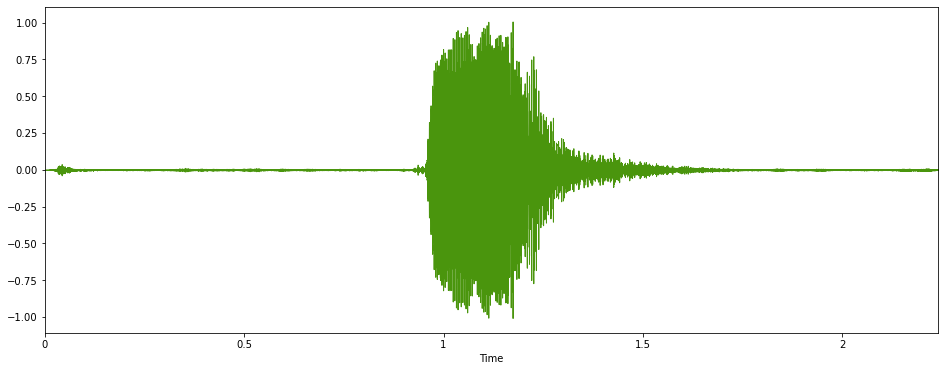

In [14]:
plt.figure(figsize = (16, 6))
librosa.display.waveplot(y = audio_file, sr = sr, color = "#4A950D");
#plt.title("Sound Waves in Ko");
plt.savefig("AudioKo.png")

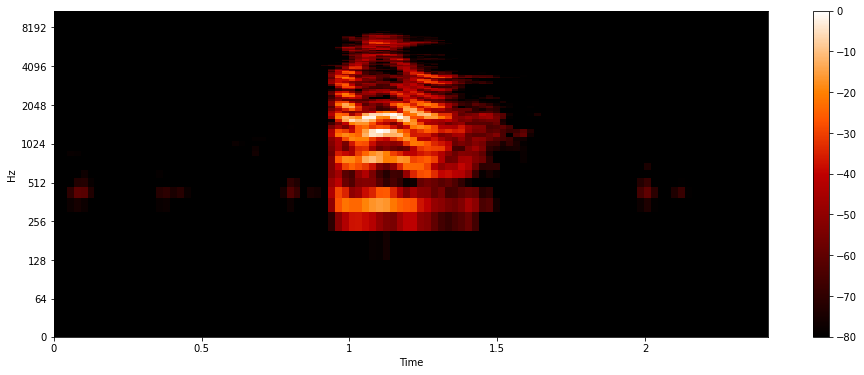

In [15]:
# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)


y, sr = librosa.load(f'./OData/alphabets_audio/o/o_3.mp3')
y, _ = librosa.effects.trim(y)


S = librosa.feature.melspectrogram(y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log', cmap = 'gist_heat');
plt.colorbar();
#plt.title("O(Soreo) Mel Spectrogram", fontsize = 23);
plt.savefig("KoMelSpecto.png")

In [16]:
# Total zero_crossings in our 1 song
zero_crossings = librosa.zero_crossings(audio_file, pad=False)
print(zero_crossings)
print(sum(zero_crossings))

[False  True  True ... False False False]
3492


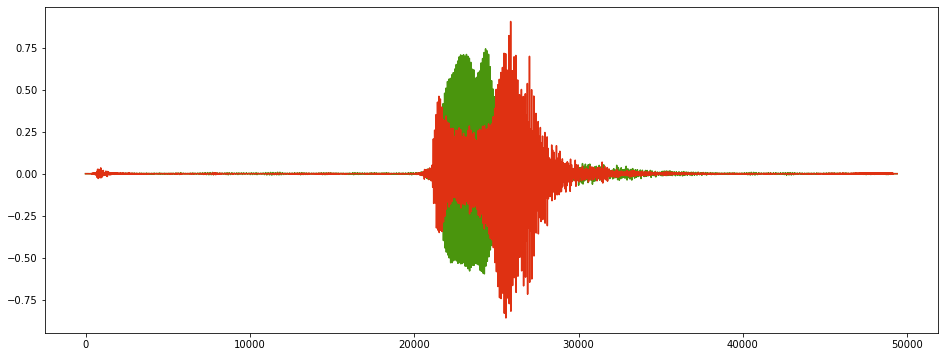

In [17]:
y_harm, y_perc = librosa.effects.hpss(audio_file)

plt.figure(figsize = (16, 6))
plt.plot(y_harm, color = '#4A950D');
plt.plot(y_perc, color = '#DF3112');
#plt.title("Zero Crossing Rate", fontsize = 23);
plt.savefig("KoZeroCross.png")

In [18]:
# Calculate the Spectral Centroids
spectral_centroids = librosa.feature.spectral_centroid(audio_file, sr=sr)[0]

#rms calculation
rms = np.sqrt(np.mean(spectral_centroids**2))
mean = np.mean(spectral_centroids**2)
print("spectral_centroid_mean: ", mean, "\n")
print("spectral_centroid_rms: ", rms, "\n")

# Shape is a vector
print('Centroids:', spectral_centroids, '\n')
print('Shape of Spectral Centroids:', spectral_centroids.shape, '\n')

# Computing the time variable for visualization
frames = range(len(spectral_centroids))

# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

print('frames:', frames, '\n')
print('t:', t)

# Function that normalizes the Sound Data
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

spectral_centroid_mean:  2807419.9891070686 

spectral_centroid_rms:  1675.5357319696493 

Centroids: [4238.98439852 3509.62415215 3036.98779384 2412.91478502 2671.49490384
 2849.9342103  2907.45020736 2587.29722281 2015.43203723 1381.6115423
 1163.45921476 1024.92762448 1140.30194098 1120.77449868  856.18766156
  669.9476235   801.63424649  914.35962942  875.78910315  829.03072864
  718.30798674  695.84049898  662.90161378  726.18480217 1150.62973906
 1347.38163757 1042.40941054  978.80243526  967.86508825 1011.77568093
 1106.57929448  947.76276288  856.76830154  918.66832544  961.13362835
 1054.98532969 1184.75530462 1314.02649214 1151.18098807 1048.32622416
  839.00368993  954.04175372 1405.08134536 1765.25371459 1924.94149427
 1867.51928046 1878.76050521 1866.91859449 1675.39833123 1454.7274456
 1227.63163732 1108.66706838 1056.58325396 1062.24160856 1002.06297893
  933.66549148  927.29057491  912.10355841  910.4979007   953.21616438
 1098.58962056 1179.21775215 1215.78102013 1320.

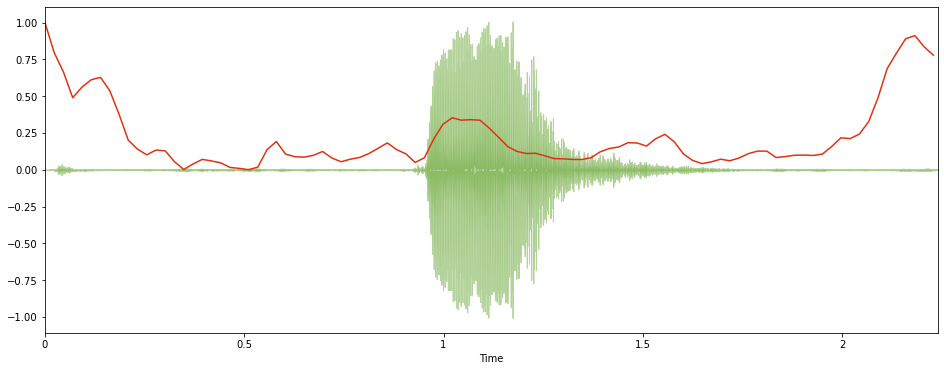

In [19]:
#Plotting the Spectral Centroid along the waveform
plt.figure(figsize = (16, 6))
librosa.display.waveplot(audio_file, sr=sr, alpha=0.4, color = '#4A950D');
plt.plot(t, normalize(spectral_centroids), color='#DF3112');
#plt.title("Spectral Centroid along the waveform", fontsize = 23);
plt.savefig("KoSpectralCentroid.png")

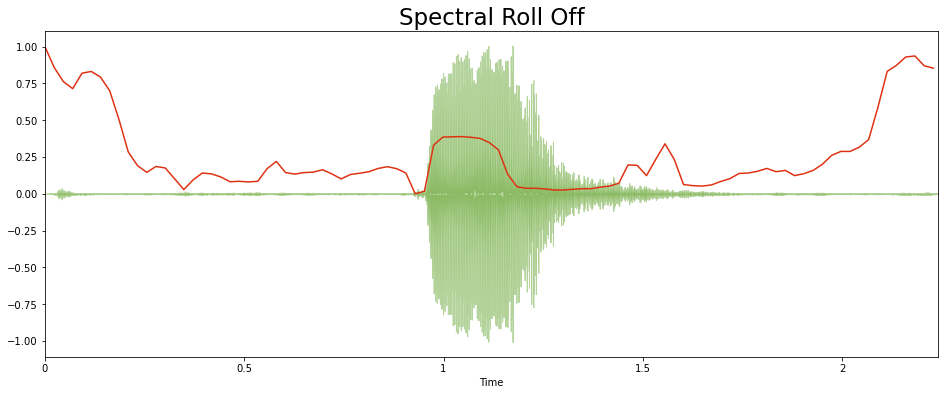

In [20]:
# Spectral RollOff Vector
spectral_rolloff = librosa.feature.spectral_rolloff(audio_file, sr=sr)[0]

# The plot
plt.figure(figsize = (16, 6))
librosa.display.waveplot(audio_file, sr=sr, alpha=0.4, color = '#4A950D');
plt.plot(t, normalize(spectral_rolloff), color='#DF3112');
plt.title("Spectral Roll Off", fontsize = 23);
plt.savefig("KoSpectralRollOf.png")

Chromogram shape: (12, 10)


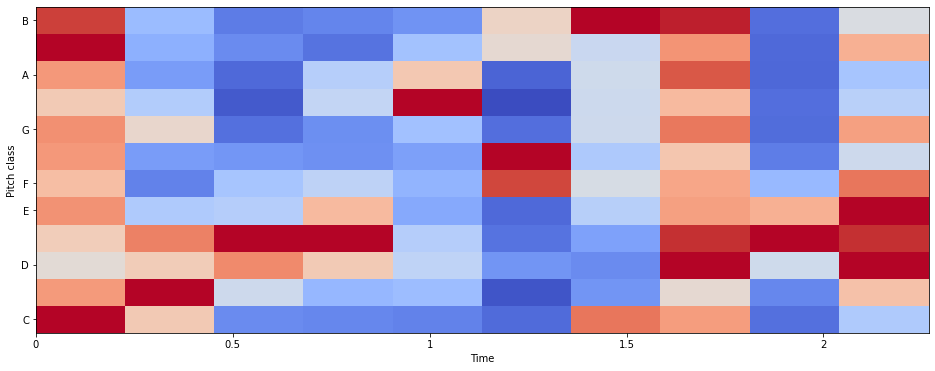

In [21]:
# Increase or decrease hop_length to change how granular you want your data to be
hop_length = 5000

# Chromogram
chromagram = librosa.feature.chroma_stft(audio_file, sr=sr, hop_length=hop_length)
print('Chromogram shape:', chromagram.shape)

plt.figure(figsize=(16, 6))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm');
#plt.title("Chroma Frequencies", fontsize = 23);
plt.savefig("KoChromaFrequencies.png")

mfccs shape: (20, 97)


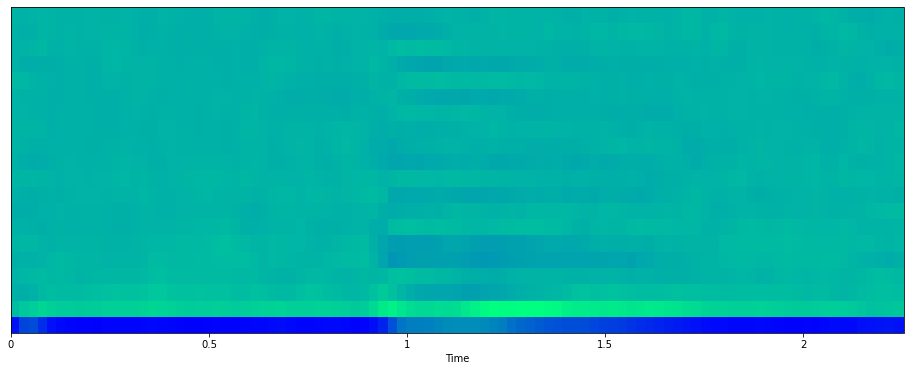

In [22]:
mfccs = librosa.feature.mfcc(audio_file, sr=sr)
print('mfccs shape:', mfccs.shape)

#Displaying  the MFCCs:
plt.figure(figsize = (16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'winter');
#plt.title("Mel-Frequency Cepstral Coefficients", fontsize = 23);
plt.savefig("KoMelFreq.png")

Mean: 2.826612e-09 

Var: 1.0


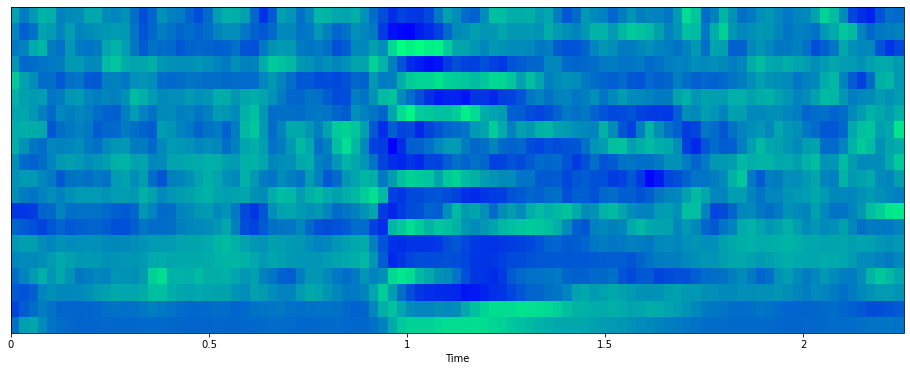

In [23]:
# Perform Feature Scaling
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print('Mean:', mfccs.mean(), '\n')
print('Var:', mfccs.var())

plt.figure(figsize = (16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'winter');
#plt.title("Mel-Frequency Cepstral Coefficients (Data scaled)", fontsize = 23);
plt.savefig("KoMelFreq.png")

In [3]:
cmap = plt.get_cmap('inferno')

plt.figure(figsize=(10,10))
genres = "o i u ri a ii uu e oo oi ou ko kho go gho ngo cho chho jo jho ngeo sho to tho do dho no ro too thoo doo dhoo lo po pho bo bho mo ho".split()
for g in genres:
    pathlib.Path(f'OData/images_alphabets/{g}').mkdir(parents=True, exist_ok=True)     
    for filename in os.listdir(f'./OData/alphabets_audio/{g}'):
        songname = f'./OData/alphabets_audio/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=5)
        plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
        plt.axis('off');
        plt.savefig(f'OData/images_alphabets/{g}/{filename[:-3].replace(".", "")}.png')
        plt.clf()
print("images saved")

images saved


<Figure size 720x720 with 0 Axes>

In [4]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [5]:
file = open('data.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = "o i u ri a ii uu e oo oi ou ko kho go gho ngo cho chho jo jho ngeo sho to tho do dho no ro too thoo doo dhoo lo po pho bo bho mo ho".split()
for g in genres:
    for filename in os.listdir(f'./OData/alphabets_audio/{g}'):
        songname = f'./OData/alphabets_audio/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        rmse = librosa.feature.rms(y=y)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('data.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())
print("data.csv file generated!!!")

data.csv file generated!!!


In [3]:
data = pd.read_csv('data.csv')
data = data.iloc[0:, 1:] 
data.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.374646,0.069043,1414.225043,1512.678968,2772.976685,0.080610,-327.367676,130.346481,-16.829220,6.632060,...,9.300788,0.943627,-12.284376,-13.680801,-12.587623,-5.877262,-12.457581,-15.911971,-5.620371,o
1,0.348134,0.032589,1729.142639,1709.129433,3412.294922,0.092150,-372.455383,107.623070,-19.474079,26.258610,...,-3.138299,-3.279735,-12.609122,-6.714983,-3.320210,-9.231659,-6.293933,-9.111668,-2.679028,o
2,0.448848,0.040660,1828.566654,1715.250602,3572.337693,0.107661,-366.488220,100.993851,-8.939088,12.706804,...,-10.478295,-14.383248,-7.477084,-4.911939,-5.687960,-8.941733,-8.309312,-9.232071,-4.990051,o
3,0.365782,0.035604,1382.318385,1417.552363,2618.943401,0.073878,-416.481934,79.700493,7.804898,0.992504,...,-7.449109,-7.864970,-8.292679,-9.276180,-5.438520,-10.422809,-6.105498,-4.719115,-6.734215,o
4,0.511270,0.008056,991.554557,1312.825589,1783.928001,0.036288,-537.568909,157.453980,6.069560,30.317884,...,5.393772,1.391175,7.223460,12.787227,4.242144,2.056462,3.777615,-2.109648,0.577991,o


In [4]:
data.shape
#y = data['label']
#print(y.nunique())

(4095, 27)

In [10]:
data = data.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']

#### NORMALIZE X ####
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)


#### PCA 2 COMPONENTS ####
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

pca.explained_variance_ratio_

array([0.31473194, 0.15381765])

Text(0, 0.5, 'Principal Component 2')

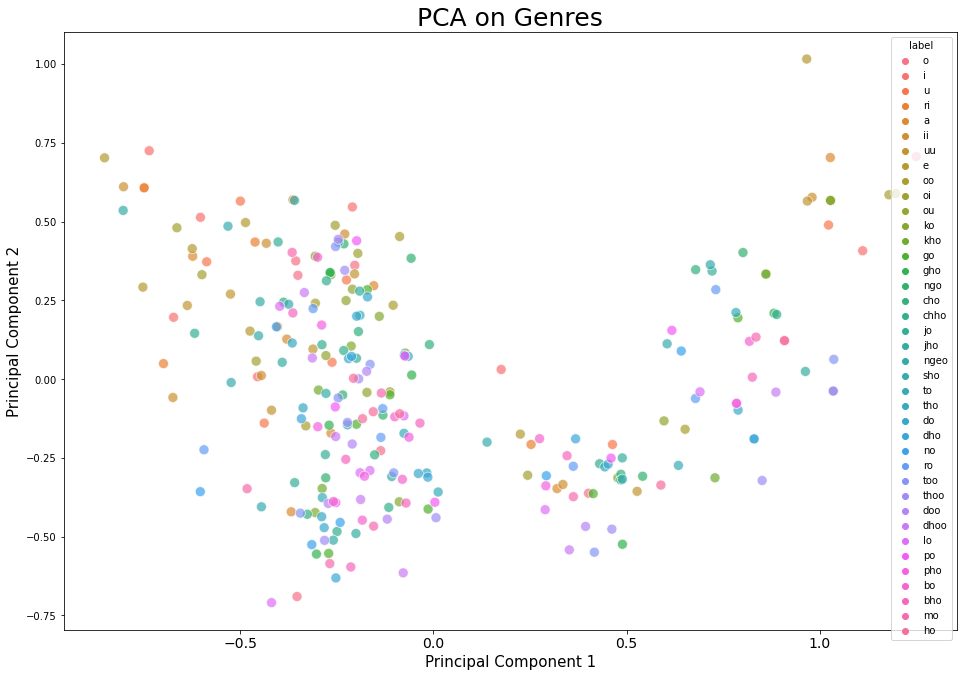

In [11]:
plt.figure(figsize = (16, 11))
sns.scatterplot(x = "principal component 1", y = "principal component 2", data = finalDf, hue = "label", alpha = 0.7, s = 100);

plt.title('PCA on Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
#plt.savefig("PCA Scattert.jpg")

In [5]:
#Encoding the Labels
from sklearn.preprocessing import LabelEncoder, StandardScaler
genre_list = data.iloc[:, -1]
#print(genre_list)
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)
#print(y)
#s = set(y)
#print(s)

In [6]:
#Scaling the Feature columns
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y) #stratify creates balanced splitting
print(len(y_train))
print(len(y_test))
print(X_train[10])
print(y_test)
#calculating unique classes in y_test.
unique_elements, counts_elements = np.unique(y_test, return_counts=True)
print(unique_elements)
print(counts_elements)
print(unique_elements.shape)

2866
1229
[-1.09138427e+00 -1.52664433e+00 -1.88818189e-01 -3.59679434e-01
  1.86625452e-01  1.28676492e-04 -1.41639096e+00 -3.10744815e-02
 -3.43021589e-01 -4.21664133e-01  1.96805140e-01 -6.93745477e-01
 -9.48587310e-01 -1.14549264e+00  1.12762985e-01 -4.90572657e-01
 -3.62191085e-01  3.60020462e-02 -7.82684570e-03 -8.40650725e-01
 -4.61386600e-01 -3.05162210e-01  6.92633877e-02 -7.74919169e-01
  5.69811946e-01  2.37766091e-01]
[25 22 32 ... 28 25 19]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]
[32 32 31 32 31 31 32 32 31 31 31 32 32 31 31 32 32 31 31 31 32 32 32 31
 32 31 32 31 32 31 32 32 31 31 32 31 31 32 32]
(39,)


In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
#clf = SVC(kernel='linear', decision_function_shape="ovo").fit(X_train, y_train)

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1).fit(X_train, y_train)

y_score = clf.predict(X_test)

#print(y_score[0:5])

n_right = 0
for i in range(len(y_score)):
    if y_score[i] == y_test[i]:
        n_right += 1


#print(y_test)
#print(y_score)

print("Multi-layer Perceptron classifier Accuracy: %.2f%%" % ((n_right/float(len(y_test)) * 100)))

cm = confusion_matrix(y_test, y_score)

print("Acuracy: " % accuracy_score(y_test, y_score))
print(cm)
print(classification_report(y_test, y_score))

Multi-layer Perceptron classifier Accuracy: 99.27%
Acuracy: 
[[32  0  0 ...  0  0  0]
 [ 0 32  0 ...  0  0  0]
 [ 0  0 31 ...  0  0  0]
 ...
 [ 0  0  0 ... 31  0  0]
 [ 0  0  0 ...  0 32  0]
 [ 0  0  0 ...  0  0 32]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        32
           2       1.00      1.00      1.00        31
           3       1.00      1.00      1.00        32
           4       1.00      1.00      1.00        31
           5       1.00      1.00      1.00        31
           6       1.00      1.00      1.00        32
           7       1.00      1.00      1.00        32
           8       1.00      0.84      0.91        31
           9       1.00      1.00      1.00        31
          10       1.00      1.00      1.00        31
          11       1.00      1.00      1.00        32
          12       1.00      1.00      1.00        32
          13       1.00   

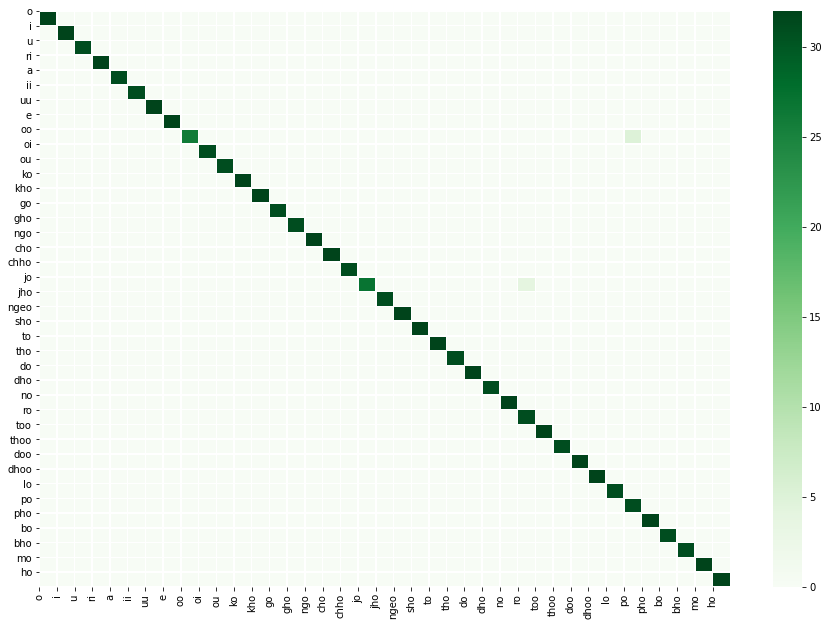

<Figure size 432x288 with 0 Axes>

In [9]:
genres = "o i u ri a ii uu e oo oi ou ko kho go gho ngo cho chho jo jho ngeo sho to tho do dho no ro too thoo doo dhoo lo po pho bo bho mo ho".split()

fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([0,0,1,1])
ax = sns.heatmap(confusion_matrix(y_test, y_score), linewidth=0.5,  annot=False, fmt="d", cmap="Greens")
p = range(len(genres))
plt.xticks(p, genres, rotation= 90)
#reversed_list = Category_list[::-1]
plt.yticks(p, genres, rotation=0)
plt.show()
plt.savefig("MLPCConfusionMatrix.png")

In [13]:
#clf = SVC(kernel='linear', decision_function_shape="ovo").fit(X_train, y_train)

#clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1).fit(X_train, y_train)

clf = XGBRFClassifier(objective= 'multi:softmax').fit(X_train, y_train)
    
    
y_score = clf.predict(X_test)

#print(y_score[0:5])

n_right = 0
for i in range(len(y_score)):
    if y_score[i] == y_test[i]:
        n_right += 1


#print(y_test)
#print(y_score)

print("Suport Vector Machine classifier Accuracy: %.2f%%" % ((n_right/float(len(y_test)) * 100)))

cm = confusion_matrix(y_test, y_score)

print("Acuracy: " % accuracy_score(y_test, y_score))
print(cm)
print(classification_report(y_test, y_score))

Suport Vector Machine classifier Accuracy: 91.54%
Acuracy: 
[[32  0  0 ...  0  0  0]
 [ 0 23  9 ...  0  0  0]
 [ 0  0 31 ...  0  0  0]
 ...
 [ 0  0  0 ... 15  0  0]
 [ 0  0  0 ...  0 32  0]
 [ 0  0  0 ...  0  0 32]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.96        32
           1       1.00      0.72      0.84        32
           2       0.78      1.00      0.87        31
           3       1.00      1.00      1.00        32
           4       1.00      1.00      1.00        31
           5       1.00      1.00      1.00        31
           6       0.78      0.78      0.78        32
           7       1.00      0.91      0.95        32
           8       0.89      1.00      0.94        31
           9       1.00      1.00      1.00        31
          10       0.65      1.00      0.78        31
          11       0.83      0.91      0.87        32
          12       0.78      1.00      0.88        32
          13       0.89    

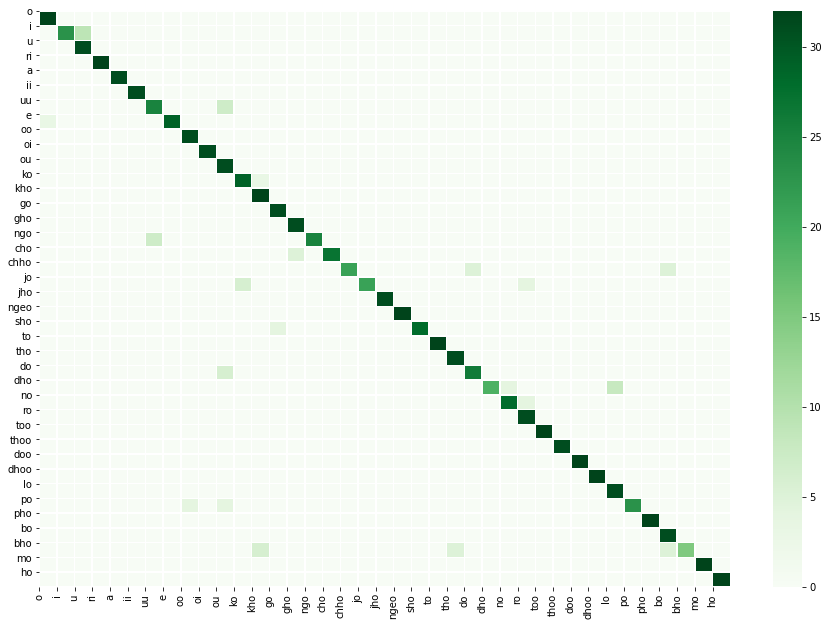

<Figure size 432x288 with 0 Axes>

In [14]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([0,0,1,1])
ax = sns.heatmap(cm, linewidth=0.5,  annot=False, fmt="d", cmap="Greens")
p = range(len(genres))
plt.xticks(p, genres, rotation= 90)
#reversed_list = Category_list[::-1]
plt.yticks(p, genres, rotation=0)
plt.show()
plt.savefig("SVMConfusionMatrix.png")

In [20]:
def model_assess(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(confusion_matrix(y_test, preds))
    print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5), '\n')

In [21]:
# Naive Bayes
nb = GaussianNB()
model_assess(nb, "Naive Bayes")

# Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=5000, random_state=0)
model_assess(sgd, "Stochastic Gradient Descent")

# KNN
knn = KNeighborsClassifier(n_neighbors=19)
model_assess(knn, "KNN")

# Decission trees
tree = DecisionTreeClassifier()
model_assess(tree, "Decission trees")

# Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_assess(rforest, "Random Forest")

# Support Vector Machine
svm = SVC(decision_function_shape="ovo")
model_assess(svm, "Support Vector Machine")

# Logistic Regression
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_assess(lg, "Logistic Regression")

# Neural Nets
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1)
model_assess(nn, "Neural Nets")

# Cross Gradient Booster
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
model_assess(xgb, "Cross Gradient Booster")

# Cross Gradient Booster (Random Forest)
xgbrf = XGBRFClassifier(objective= 'multi:softmax')
model_assess(xgbrf, "Cross Gradient Booster (Random Forest)")

[[ 8  0  0 ...  0  0  0]
 [ 0  4  0 ...  0  0  0]
 [ 0  0 15 ...  0  0  0]
 ...
 [ 0  0  0 ...  3  0  0]
 [ 3  0  0 ...  0  6  0]
 [ 4  0  0 ...  0  0 11]]
Accuracy Naive Bayes : 0.40537 

[[21  0  0 ...  0  0  0]
 [ 0 21  0 ...  0  0  0]
 [ 0  0 17 ...  0  0  0]
 ...
 [ 0  0  0 ...  9  0  0]
 [ 0  0  0 ...  0 21  0]
 [ 0  0  0 ...  0  0 17]]
Accuracy Stochastic Gradient Descent : 0.78632 

[[21  0  0 ...  0  0  0]
 [ 0 15  0 ...  0  0  0]
 [ 0  0 21 ...  0  0  0]
 ...
 [ 0  0  0 ... 21  0  0]
 [ 0  0  0 ...  0  9  6]
 [ 0  0  0 ...  0  0 21]]
Accuracy KNN : 0.86081 

[[21  0  0 ...  0  0  0]
 [ 0 21  0 ...  0  0  0]
 [ 0  0 21 ...  0  0  0]
 ...
 [ 0  0  0 ... 21  0  0]
 [ 0  0  0 ...  0 21  0]
 [ 0  0  0 ...  0  0 21]]
Accuracy Decission trees : 0.99267 

[[21  0  0 ...  0  0  0]
 [ 0 21  0 ...  0  0  0]
 [ 0  0 21 ...  0  0  0]
 ...
 [ 0  0  0 ... 21  0  0]
 [ 0  0  0 ...  0 21  0]
 [ 0  0  0 ...  0  0 21]]
Accuracy Random Forest : 0.99267 

[[21  0  0 ...  0  0  0]
 [ 0 21  0 ...  

In [41]:
y = data['label'] # genre variable.
X = data.loc[:, data.columns != 'label'] #select all columns but not the labels

#### NORMALIZE X ####

# Normalize so everything is on the same scale. 

cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)

# new data frame with the new scaled data. 
X = pd.DataFrame(np_scaled, columns = cols)
X.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,0.291766,0.000000,0.247904,0.230021,0.310723,0.252024,0.322864,0.473632,0.089274,0.307299,...,0.847334,0.782366,1.000000,0.892157,0.263164,0.743465,0.801713,0.514835,0.746096,0.527329
1,0.267921,0.574307,0.179120,0.202896,0.192334,0.240563,0.722027,0.844538,0.258655,0.316642,...,0.409443,0.231526,0.557753,0.767683,0.286672,0.521141,0.282207,0.619865,0.757663,0.731847
2,0.106362,0.120441,0.231583,0.326951,0.374360,0.095268,0.327313,0.216923,0.477038,1.000000,...,0.502215,0.513772,0.373856,0.299410,0.207340,0.921857,0.451779,0.260383,1.000000,0.684575
3,0.505842,0.135641,0.191402,0.126252,0.233895,0.197766,0.341732,0.756829,0.000000,0.080031,...,0.862561,0.416836,0.400950,0.506058,0.430507,0.065213,0.636755,0.245727,0.733404,0.886357
4,0.026197,0.410490,0.128230,0.188105,0.224276,0.015837,0.381154,0.602652,0.350628,0.582089,...,0.542378,0.448983,0.458069,0.734888,0.056497,0.765800,0.689967,0.258204,0.844567,0.743667


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)